<a href="https://colab.research.google.com/github/KNL1979/DS807/blob/main/Q2_autoencoder_AE5_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization of autoencoder AE5

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Dropout,BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# path to file
%cd '/content/gdrive/MyDrive/Applied_ML'

/content/gdrive/MyDrive/Applied_ML


In [ ]:
# Load the training data
X_train = np.load('eksamen/dataset/X_train_new.npy')
X_val = np.load('eksamen/dataset/X_val_new.npy')
print(f'Shape of the training data: {X_train.shape}')
print(f'Shape of the validataion data: {X_val.shape}')

Shape of the training data: (55050, 96, 96, 3)
Shape of the validataion data: (15729, 96, 96, 3)


In [ ]:
# function to build autoencoder
def build_model(activation = 'relu'):
  encoder = tf.keras.models.Sequential([
    Conv2D(64, 3, 2, activation=activation, padding='same', input_shape=(96, 96, 3)),
    Conv2D(32, 3, 2, activation=activation, padding='same'),
    Conv2D(16, 3, 2, activation=activation, padding='same'),
  ], name='encoder')

  decoder = tf.keras.models.Sequential([
    Conv2DTranspose(16, 3, 2, padding='same', activation=activation, input_shape=(12, 12, 16)),
    Conv2DTranspose(32, 3, 2, padding='same', activation=activation),
    Conv2DTranspose(64, 3, 2, padding='same', activation=activation),
    Conv2D(3, 3, activation='sigmoid', padding='same')
  ], name='decoder')

  autoencoder = tf.keras.models.Sequential([encoder, decoder], name = 'autoencoder')

  return autoencoder


In [ ]:
# Loop that do not work. I would have run loops on the lists that are commented out, but my colab pro ran out of RAM after 2 models
#optimizers = ['sgd', 'adam', 'adagrad', 'rmsprop']
#learning_rate = [0.01, 0.001, 0.0001]
#batch_size = [16, 32, 64]

# Instead i ran sets of two, but i do not think that i clear the memory properly.
# i think i keep trainin on top of the old mae and loss values
# in this way model two has a positive bias
optimizers = ['adagrad','rmsprop']
learning_rate = [0.01]
batch_size = [16]

model_number = 1
histories = {}

for lr in learning_rate:
  for batch in batch_size:
    for opt in optimizers:
      model_name = f'Model_{model_number}_LR_{lr}_Batch_{batch}_Optimizer_{opt}'
      K.clear_session() # clear Tensorflow session - maybe help clear RAM usage
      AE = build_model()
      AE.compile(
        optimizer=opt,
        loss='mse',
        metrics=['mae'],
        )

      history = AE.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=20, batch_size=batch)
      histories[model_name] = history.history
      model_number +=1


Epoch 1/20
3441/3441 [==============================] - 34s 9ms/step - loss: 0.0746 - mae: 0.2356 - val_loss: 0.0665 - val_mae: 0.2223
Epoch 2/20
3441/3441 [==============================] - 24s 7ms/step - loss: 0.0624 - mae: 0.2144 - val_loss: 0.0603 - val_mae: 0.2094
Epoch 3/20
3441/3441 [==============================] - 24s 7ms/step - loss: 0.0595 - mae: 0.2072 - val_loss: 0.0596 - val_mae: 0.2067
Epoch 4/20
3441/3441 [==============================] - 25s 7ms/step - loss: 0.0592 - mae: 0.2058 - val_loss: 0.0595 - val_mae: 0.2061
Epoch 5/20
3441/3441 [==============================] - 24s 7ms/step - loss: 0.0592 - mae: 0.2055 - val_loss: 0.0595 - val_mae: 0.2060
Epoch 6/20
3441/3441 [==============================] - 24s 7ms/step - loss: 0.0592 - mae: 0.2054 - val_loss: 0.0595 - val_mae: 0.2060
Epoch 7/20
3441/3441 [==============================] - 24s 7ms/step - loss: 0.0592 - mae: 0.2053 - val_loss: 0.0595 - val_mae: 0.2059
Epoch 8/20
3441/3441 [==============================] -

In [ ]:
# save histories
np.save('histories_lr_0.01_B16.npy', histories)

In [ ]:
np.save('histories_lr_0.001_B16.npy', histories)

In [ ]:
np.save('histories_lr_0.0001_B16.npy', histories)

In [ ]:
np.save('histories_lr_0.001_B32.npy', histories)

In [ ]:
np.save('histories_lr_0.001_B64.npy', histories)

In [ ]:
np.save('histories_lr_0.001_B64_adagrad_rmsprop.npy', histories)

In [ ]:
np.save('histories_lr_0.01_B64_adagrad_rmsprop.npy', histories)

In [ ]:
np.save('histories_lr_0.001_B32_adagrad_rmsprop.npy', histories)

In [ ]:
np.save('histories_lr_0.001_B16_adagrad_rmsprop.npy', histories)

In [ ]:
np.save('histories_lr_0.01_B16_adagrad_rmsprop.npy', histories)

In [ ]:
# load histories and remove model number as it does not make sence to include it anymore
histories1 = np.load('histories_lr_0.01_B16.npy', allow_pickle=True).item()
histories1_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories1.items()}
histories2 = np.load('histories_lr_0.001_B16.npy', allow_pickle=True).item()
histories2_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories2.items()}
histories3 = np.load('histories_lr_0.0001_B16.npy', allow_pickle=True).item()
histories3_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories3.items()}
histories4 = np.load('histories_lr_0.001_B32.npy', allow_pickle=True).item()
histories4_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories4.items()}
histories5 = np.load('histories_lr_0.001_B64.npy', allow_pickle=True).item()
histories5_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories5.items()}
histories6 = np.load('histories_lr_0.01_B16_adagrad_rmsprop.npy', allow_pickle=True).item()
histories6_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories6.items()}
histories7 = np.load('histories_lr_0.001_B16_adagrad_rmsprop.npy', allow_pickle=True).item()
histories7_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories7.items()}
histories8 = np.load('histories_lr_0.001_B32_adagrad_rmsprop.npy', allow_pickle=True).item()
histories8_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories8.items()}
histories9 = np.load('histories_lr_0.001_B64_adagrad_rmsprop.npy', allow_pickle=True).item()
histories9_new = {key.replace('Model_1_', '').replace('Model_2_', ''): value for key, value in histories9.items()}

In [ ]:
# divide the histories to single models so they can be combined in different ways
SGD_01_16, history1_1 = list(histories1_new.items())[0]
Adam_01_16, history1_2 = list(histories1_new.items())[1]
SGD_001_16, history2_1 = list(histories2_new.items())[0]
Adam_001_16, history2_2 = list(histories2_new.items())[1]
SGD_0001_16, history3_1 = list(histories3_new.items())[0]
Adam_0001_16, history3_2 = list(histories3_new.items())[1]

SGD_001_32, history4_1 = list(histories4_new.items())[0]
Adam_001_32, history4_2 = list(histories4_new.items())[1]

SGD_001_64, history5_1 = list(histories5_new.items())[0]
Adam_001_64, history5_2 = list(histories5_new.items())[1]


Adagrad_01_16, history6_1 = list(histories6_new.items())[0]
rmsprop_01_16, history6_2 = list(histories6_new.items())[1]
Adagrad_001_16, history7_1 = list(histories7_new.items())[0]
rmsprop_001_16, history7_2 = list(histories7_new.items())[1]

Adagrad_001_32, history8_1 = list(histories8_new.items())[0]
rmsprop_001_32, history8_2 = list(histories8_new.items())[1]

Adagrad_001_64, history9_1 = list(histories9_new.items())[0]
rmsprop_001_64, history9_2 = list(histories9_new.items())[1]

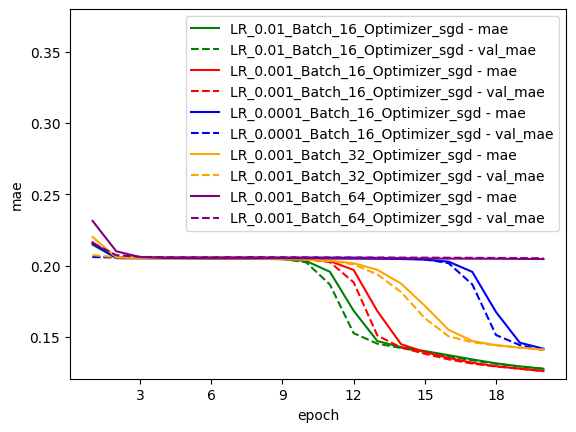

In [ ]:
# plot SGD mae
from matplotlib.ticker import MaxNLocator

epoch = list(range(1, 21))

plt.plot(epoch, history1_1['mae'], label=f'{SGD_01_16} - mae', color='green')
plt.plot(epoch,history1_1['val_mae'], label=f'{SGD_01_16} - val_mae', color='green', linestyle='dashed')
plt.plot(epoch,history2_1['mae'], label=f'{SGD_001_16} - mae', color='red')
plt.plot(epoch,history2_1['val_mae'], label=f'{SGD_001_16} - val_mae', color='red', linestyle='dashed')
plt.plot(epoch,history3_1['mae'], label=f'{SGD_0001_16} - mae', color='blue')
plt.plot(epoch,history3_1['val_mae'], label=f'{SGD_0001_16} - val_mae', color='blue', linestyle='dashed')
plt.plot(epoch,history4_1['mae'], label=f'{SGD_001_32} - mae', color='orange')
plt.plot(epoch,history4_1['val_mae'], label=f'{SGD_001_32} - val_mae', color='orange', linestyle='dashed')
plt.plot(epoch,history5_1['mae'], label=f'{SGD_001_64} - mae', color='purple')
plt.plot(epoch,history5_1['val_mae'], label=f'{SGD_001_64} - val_mae', color='purple', linestyle='dashed')

plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top=0.38)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

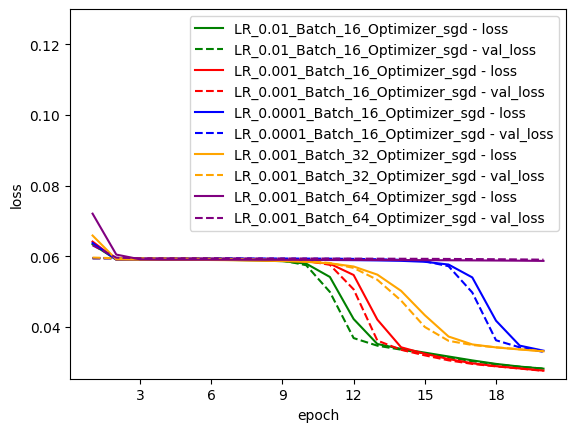

In [ ]:
# plot SGD loss

plt.plot(epoch,history1_1['loss'], label=f'{SGD_01_16} - loss', color='green')
plt.plot(epoch,history1_1['val_loss'], label=f'{SGD_01_16} - val_loss', color='green', linestyle='dashed')
plt.plot(epoch,history2_1['loss'], label=f'{SGD_001_16} - loss', color='red')
plt.plot(epoch,history2_1['val_loss'], label=f'{SGD_001_16} - val_loss', color='red', linestyle='dashed')
plt.plot(epoch,history3_1['loss'], label=f'{SGD_0001_16} - loss', color='blue')
plt.plot(epoch,history3_1['val_loss'], label=f'{SGD_0001_16} - val_loss', color='blue', linestyle='dashed')
plt.plot(epoch,history4_1['loss'], label=f'{SGD_001_32} - loss', color='orange')
plt.plot(epoch,history4_1['val_loss'], label=f'{SGD_001_32} - val_loss', color='orange', linestyle='dashed')
plt.plot(epoch,history5_1['loss'], label=f'{SGD_001_64} - loss', color='purple')
plt.plot(epoch,history5_1['val_loss'], label=f'{SGD_001_64} - val_loss', color='purple', linestyle='dashed')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(top=0.13)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

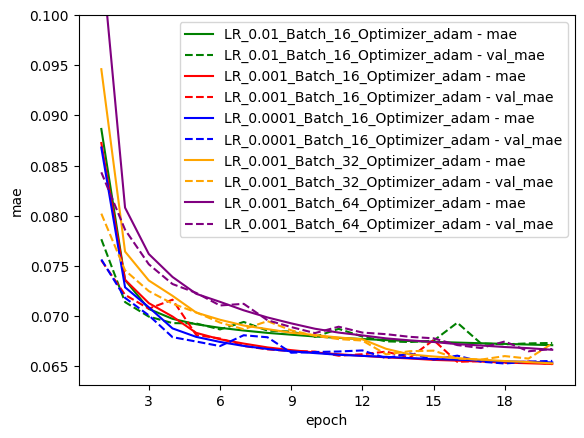

In [ ]:
# plot Adam mae

plt.plot(epoch, history1_2['mae'], label=f'{Adam_01_16} - mae', color='green')
plt.plot(epoch, history1_2['val_mae'], label=f'{Adam_01_16} - val_mae', color='green', linestyle='dashed')
plt.plot(epoch, history2_2['mae'], label=f'{Adam_001_16} - mae', color='red')
plt.plot(epoch, history2_2['val_mae'], label=f'{Adam_001_16} - val_mae', color='red', linestyle='dashed')
plt.plot(epoch, history3_2['mae'], label=f'{Adam_0001_16} - mae', color='blue')
plt.plot(epoch, history3_2['val_mae'], label=f'{Adam_0001_16} - val_mae', color='blue', linestyle='dashed')
plt.plot(epoch, history4_2['mae'], label=f'{Adam_001_32} - mae', color='orange')
plt.plot(epoch, history4_2['val_mae'], label=f'{Adam_001_32} - val_mae', color='orange', linestyle='dashed')
plt.plot(epoch, history5_2['mae'], label=f'{Adam_001_64} - mae', color='purple')
plt.plot(epoch, history5_2['val_mae'], label=f'{Adam_001_64} - val_mae', color='purple', linestyle='dashed')

plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top=0.1)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

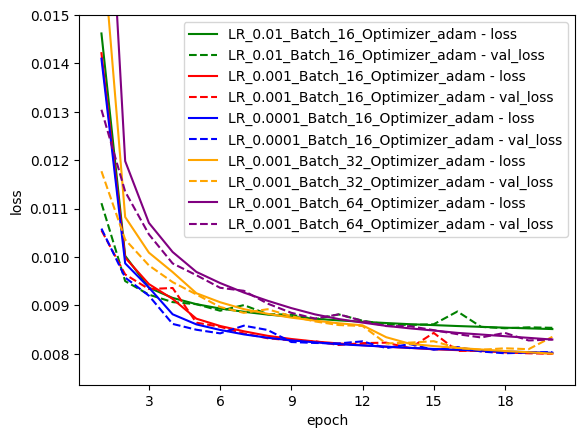

In [ ]:
# plot Adam loss

plt.plot(epoch, history1_2['loss'], label=f'{Adam_01_16} - loss', color='green')
plt.plot(epoch, history1_2['val_loss'], label=f'{Adam_01_16} - val_loss', color='green', linestyle='dashed')
plt.plot(epoch, history2_2['loss'], label=f'{Adam_001_16} - loss', color='red')
plt.plot(epoch, history2_2['val_loss'], label=f'{Adam_001_16} - val_loss', color='red', linestyle='dashed')
plt.plot(epoch, history3_2['loss'], label=f'{Adam_0001_16} - loss', color='blue')
plt.plot(epoch, history3_2['val_loss'], label=f'{Adam_0001_16} - val_loss', color='blue', linestyle='dashed')
plt.plot(epoch, history4_2['loss'], label=f'{Adam_001_32} - loss', color='orange')
plt.plot(epoch, history4_2['val_loss'], label=f'{Adam_001_32} - val_loss', color='orange', linestyle='dashed')
plt.plot(epoch, history5_2['loss'], label=f'{Adam_001_64} - loss', color='purple')
plt.plot(epoch, history5_2['val_loss'], label=f'{Adam_001_64} - val_loss', color='purple', linestyle='dashed')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(top=0.015)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

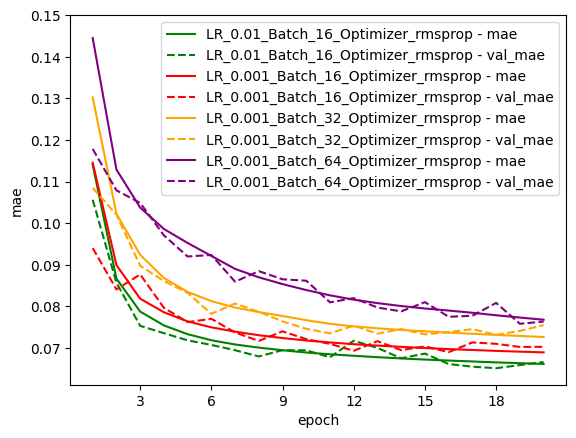

In [ ]:
# plot rmsprop mae
from matplotlib.ticker import MaxNLocator

epoch = list(range(1, 21))

plt.plot(epoch, history6_2['mae'], label=f'{rmsprop_01_16} - mae', color='green')
plt.plot(epoch, history6_2['val_mae'], label=f'{rmsprop_01_16} - val_mae', color='green', linestyle='dashed')
plt.plot(epoch, history7_2['mae'], label=f'{rmsprop_001_16} - mae', color='red')
plt.plot(epoch, history7_2['val_mae'], label=f'{rmsprop_001_16} - val_mae', color='red', linestyle='dashed')
plt.plot(epoch, history8_2['mae'], label=f'{rmsprop_001_32} - mae', color='orange')
plt.plot(epoch, history8_2['val_mae'], label=f'{rmsprop_001_32} - val_mae', color='orange', linestyle='dashed')
plt.plot(epoch, history9_2['mae'], label=f'{rmsprop_001_64} - mae', color='purple')
plt.plot(epoch, history9_2['val_mae'], label=f'{rmsprop_001_64} - val_mae', color='purple', linestyle='dashed')


plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top=0.15)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

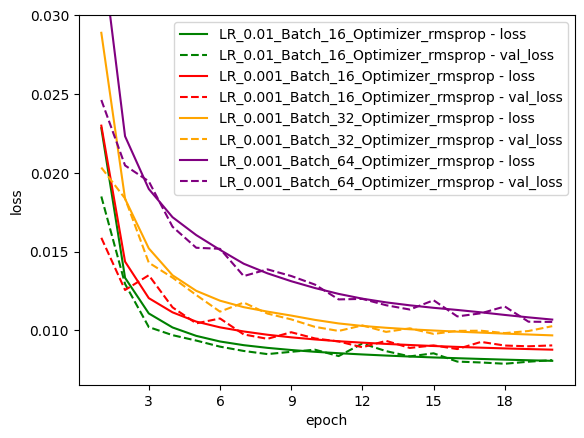

In [ ]:
# plot rmsprop loss

plt.plot(epoch, history6_2['loss'], label=f'{rmsprop_01_16} - loss', color='green')
plt.plot(epoch, history6_2['val_loss'], label=f'{rmsprop_01_16} - val_loss', color='green', linestyle='dashed')
plt.plot(epoch, history7_2['loss'], label=f'{rmsprop_001_16} - loss', color='red')
plt.plot(epoch, history7_2['val_loss'], label=f'{rmsprop_001_16} - val_loss', color='red', linestyle='dashed')
plt.plot(epoch, history8_2['loss'], label=f'{rmsprop_001_32} - loss', color='orange')
plt.plot(epoch, history8_2['val_loss'], label=f'{rmsprop_001_32} - val_loss', color='orange', linestyle='dashed')
plt.plot(epoch, history9_2['loss'], label=f'{rmsprop_001_64} - loss', color='purple')
plt.plot(epoch, history9_2['val_loss'], label=f'{rmsprop_001_64} - val_loss', color='purple', linestyle='dashed')


plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(top=0.03)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

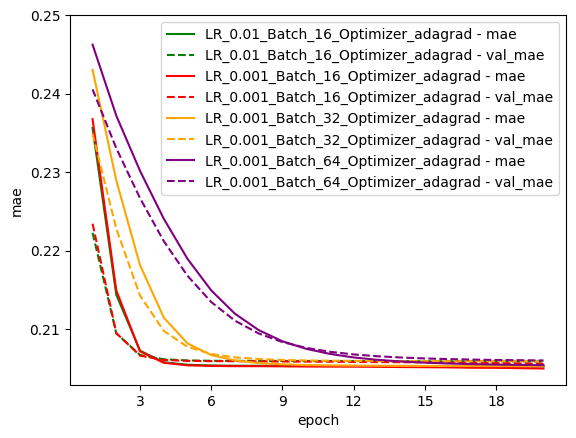

In [ ]:
# plot adagrad mae

plt.plot(epoch, history6_1['mae'], label=f'{Adagrad_01_16} - mae', color='green')
plt.plot(epoch, history6_1['val_mae'], label=f'{Adagrad_01_16} - val_mae', color='green', linestyle='dashed')
plt.plot(epoch, history7_1['mae'], label=f'{Adagrad_001_16} - mae', color='red')
plt.plot(epoch, history7_1['val_mae'], label=f'{Adagrad_001_16} - val_mae', color='red', linestyle='dashed')
plt.plot(epoch, history8_1['mae'], label=f'{Adagrad_001_32} - mae', color='orange')
plt.plot(epoch, history8_1['val_mae'], label=f'{Adagrad_001_32} - val_mae', color='orange', linestyle='dashed')
plt.plot(epoch, history9_1['mae'], label=f'{Adagrad_001_64} - mae', color='purple')
plt.plot(epoch, history9_1['val_mae'], label=f'{Adagrad_001_64} - val_mae', color='purple', linestyle='dashed')


plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top=0.25)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

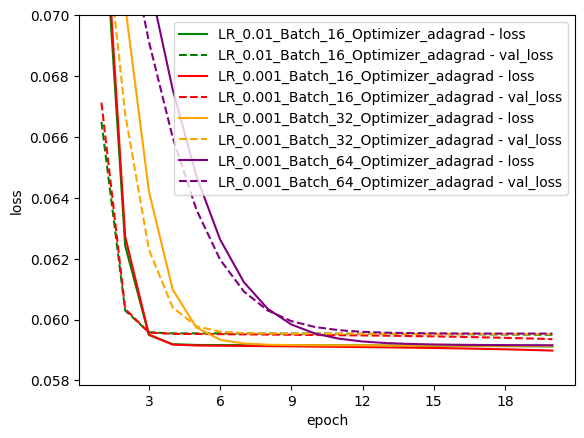

In [ ]:
# plot adagrad mae
epoch = list(range(1, 21))

plt.plot(epoch, history6_1['loss'], label=f'{Adagrad_01_16} - loss', color='green')
plt.plot(epoch, history6_1['val_loss'], label=f'{Adagrad_01_16} - val_loss', color='green', linestyle='dashed')
plt.plot(epoch, history7_1['loss'], label=f'{Adagrad_001_16} - loss', color='red')
plt.plot(epoch, history7_1['val_loss'], label=f'{Adagrad_001_16} - val_loss', color='red', linestyle='dashed')
plt.plot(epoch, history8_1['loss'], label=f'{Adagrad_001_32} - loss', color='orange')
plt.plot(epoch, history8_1['val_loss'], label=f'{Adagrad_001_32} - val_loss', color='orange', linestyle='dashed')
plt.plot(epoch, history9_1['loss'], label=f'{Adagrad_001_64} - loss', color='purple')
plt.plot(epoch, history9_1['val_loss'], label=f'{Adagrad_001_64} - val_loss', color='purple', linestyle='dashed')


plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(top=0.07)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

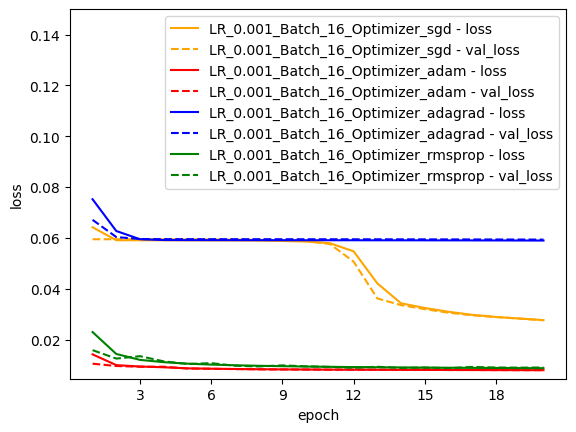

In [ ]:
# plot loss for all optimizers at LR 0.001 and batch size 16

plt.plot(epoch,history2_1['loss'], label=f'{SGD_001_16} - loss', color='orange')
plt.plot(epoch,history2_1['val_loss'], label=f'{SGD_001_16} - val_loss', color='orange', linestyle='dashed')
plt.plot(epoch, history2_2['loss'], label=f'{Adam_001_16} - loss', color='red')
plt.plot(epoch, history2_2['val_loss'], label=f'{Adam_001_16} - val_loss', color='red', linestyle='dashed')
plt.plot(epoch, history7_1['loss'], label=f'{Adagrad_001_16} - loss', color='blue')
plt.plot(epoch, history7_1['val_loss'], label=f'{Adagrad_001_16} - val_loss', color='blue', linestyle='dashed')
plt.plot(epoch, history7_2['loss'], label=f'{rmsprop_001_16} - loss', color='green')
plt.plot(epoch, history7_2['val_loss'], label=f'{rmsprop_001_16} - val_loss', color='green', linestyle='dashed')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(top=0.15)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

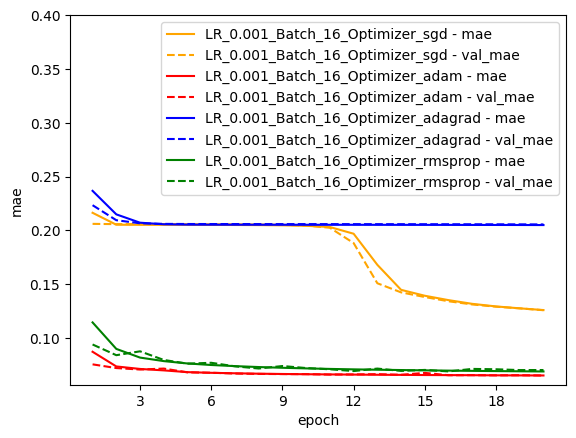

In [ ]:
# plot mae for all optimizers at LR 0.001 and batch size 16

plt.plot(epoch,history2_1['mae'], label=f'{SGD_001_16} - mae', color='orange')
plt.plot(epoch,history2_1['val_mae'], label=f'{SGD_001_16} - val_mae', color='orange', linestyle='dashed')
plt.plot(epoch, history2_2['mae'], label=f'{Adam_001_16} - mae', color='red')
plt.plot(epoch, history2_2['val_mae'], label=f'{Adam_001_16} - val_mae', color='red', linestyle='dashed')
plt.plot(epoch, history7_1['mae'], label=f'{Adagrad_001_16} - mae', color='blue')
plt.plot(epoch, history7_1['val_mae'], label=f'{Adagrad_001_16} - val_mae', color='blue', linestyle='dashed')
plt.plot(epoch, history7_2['mae'], label=f'{rmsprop_001_16} - mae', color='green')
plt.plot(epoch, history7_2['val_mae'], label=f'{rmsprop_001_16} - val_mae', color='green', linestyle='dashed')

plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top=0.4)
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()